<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
        📚 <b>Importing Libraries</b>
    </h1>
</div>


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('stopwords', quiet=True)
import re
import string
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
        📥 <b>Import Data</b>
    </h1>
</div>


In [5]:
dff = pd.read_csv("/kaggle/input/fakenewsdata/Fake.csv")
dft = pd.read_csv("/kaggle/input/fakenewsdata/True.csv")

In [6]:
dff['class']=0
dft['class']=1

In [7]:
dff.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
dft.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
dff.shape , dft.shape

((23481, 5), (21417, 5))

<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
        ⚡ <b>Mixing Fake and Real News</b>
    </h1>
</div>


In [10]:
dfm=pd.concat([dff,dft],axis=0)

In [11]:
df=dfm.sample(frac=1)

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:

df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [14]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [15]:
df

,title,text,subject,date,class
0,"Ivory Coast to retire 1,000 soldiers to slim d...",ABIDJAN (Reuters) - Ivory Coast will cut its a...,worldnews,"December 6, 2017",1
1,After year of mourning Thailand's 'floating ba...,BANGKOK (Reuters) - People in Thailand celebra...,worldnews,"November 3, 2017",1
2,VIRAL VIDEO: German Youth Deliver Powerful Ant...,"Reconquista, English Reconquest, in medieval S...",left-news,"Jan 24, 2016",0
3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,News,"March 25, 2016",0
4,It Sure Looks Like Donald Trump Would Be Puti...,The Republican Party has been wishing that Ame...,News,"July 25, 2016",0
...,...,...,...,...,...
44893,"In war-torn Darfur, new U.S. aid chief stresse...","ZAM ZAM CAMP, North Darfur (Reuters) - Washing...",worldnews,"August 28, 2017",1
44894,Lebanon's Hariri takes critical line on Hezbollah,BEIRUT (Reuters) - Lebanese Prime Minister Saa...,worldnews,"November 25, 2017",1
44895,Obama’s “CLOCK BOY” Comes Back To Texas…After ...,After 9 Months Of Hard-Core Islam Muslim Cloc...,left-news,"Jun 27, 2016",0
44896,RESTAURANT OWNER Makes Awesome Sign Mocking Tr...,Political correctness is obviously not import...,left-news,"Jun 5, 2016",0


<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
        📊 <b>Data Analysis</b>
    </h1>
</div>


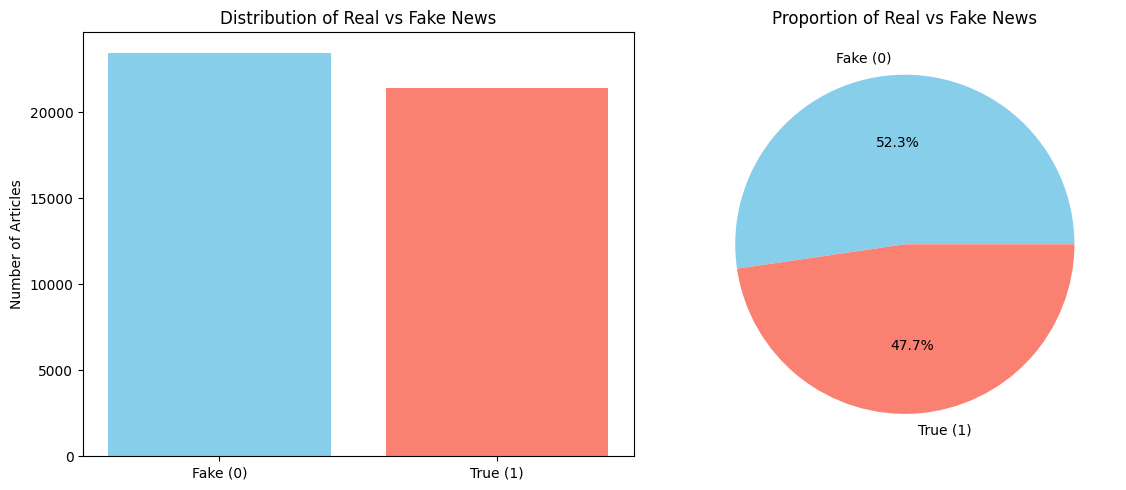

In [16]:

class_counts = df['class'].value_counts()
labels = ['Fake (0)', 'True (1)']
colors = ['skyblue', 'salmon']


fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Bar chart
axes[0].bar(labels, class_counts.values, color=colors)
axes[0].set_ylabel('Number of Articles')
axes[0].set_title('Distribution of Real vs Fake News')

# Pie chart
axes[1].pie(class_counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Proportion of Real vs Fake News')

plt.tight_layout()
plt.show()


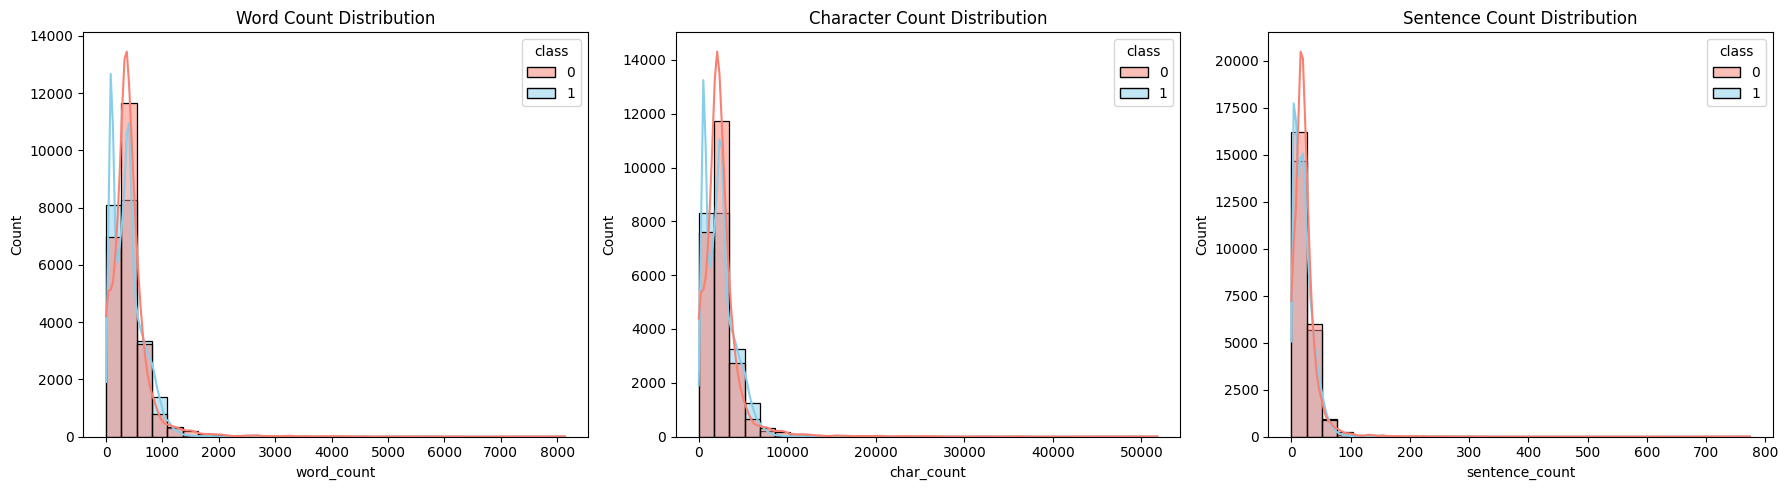

In [17]:
# Word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Character count
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Sentence count (count '.', '!', '?')
df['sentence_count'] = df['text'].apply(lambda x: str(x).count('.') + str(x).count('!') + str(x).count('?'))

# --- Visualization ---

# Histograms
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='word_count', hue='class', bins=30, palette=['salmon','skyblue'], kde=True)
plt.title('Word Count Distribution')

plt.subplot(1,3,2)
sns.histplot(data=df, x='char_count', hue='class', bins=30, palette=['salmon','skyblue'], kde=True)
plt.title('Character Count Distribution')

plt.subplot(1,3,3)
sns.histplot(data=df, x='sentence_count', hue='class', bins=30, palette=['salmon','skyblue'], kde=True)
plt.title('Sentence Count Distribution')

plt.tight_layout()
plt.show()


In [18]:
# Combine all text per class
fake_text = " ".join(df[df['class']==0]['text'])
real_text = " ".join(df[df['class']==1]['text'])

# Function to get most common words
def get_common_words(text, n=20):
    words = [word.lower() for word in text.split()]
    return Counter(words).most_common(n)

print("Top 20 words in Fake News:")
print(get_common_words(fake_text))

print("\nTop 20 words in Real News:")
print(get_common_words(real_text))


Top 20 words in Fake News:
[('the', 525528), ('to', 288565), ('of', 235161), ('and', 222329), ('a', 209598), ('in', 162846), ('that', 144901), ('s', 128331), ('is', 107720), ('for', 91066), ('on', 79829), ('he', 76896), ('it', 70359), ('was', 66944), ('trump', 65511), ('with', 62025), ('his', 57885), ('as', 55422), ('this', 51753), ('be', 47794)]

Top 20 words in Real News:
[('the', 477832), ('to', 244369), ('of', 204654), ('a', 196601), ('and', 180796), ('in', 179501), ('on', 107739), ('that', 84922), ('for', 79112), ('said', 72035), ('is', 54706), ('with', 54074), ('he', 52548), ('was', 47762), ('by', 47484), ('as', 46871), ('has', 46036), ('s', 44709), ('it', 41937), ('from', 39189)]


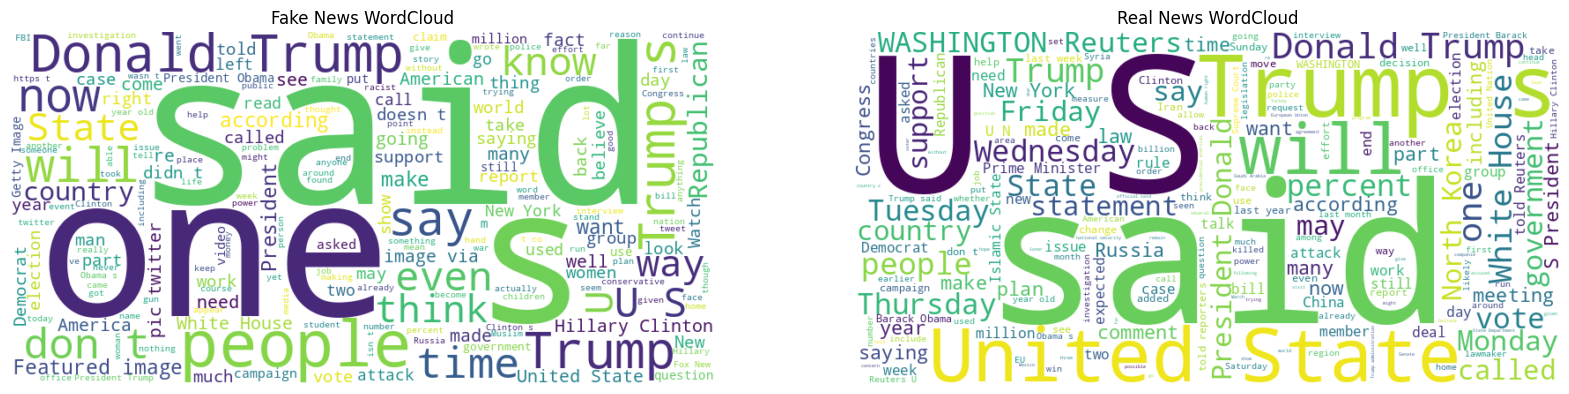

In [19]:

stopwords = set(STOPWORDS)
fake_wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(fake_text)
real_wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(real_text)


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News WordCloud')

plt.subplot(1,2,2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Real News WordCloud')
plt.show()


In [20]:
# Count stopwords frequency in each class
def count_stopwords(text):
    words = [word.lower() for word in text.split()]
    stopword_list = [w for w in words if w in STOPWORDS]
    return Counter(stopword_list).most_common(10)

print("Top stopwords in Fake News:")
print(count_stopwords(fake_text))

print("\nTop stopwords in Real News:")
print(count_stopwords(real_text))


Top stopwords in Fake News:
[('the', 525528), ('to', 288565), ('of', 235161), ('and', 222329), ('a', 209598), ('in', 162846), ('that', 144901), ('is', 107720), ('for', 91066), ('on', 79829)]

Top stopwords in Real News:
[('the', 477832), ('to', 244369), ('of', 204654), ('a', 196601), ('and', 180796), ('in', 179501), ('on', 107739), ('that', 84922), ('for', 79112), ('is', 54706)]


In [21]:
def get_top_ngrams(corpus, ngram_range=(2,2), n=None):
    """
    corpus: list of text
    ngram_range: (2,2) for bigram, (3,3) for trigram
    n: top n n-grams
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [22]:

fake_corpus = df[df['class']==0]['text'].tolist()
real_corpus = df[df['class']==1]['text'].tolist()

# Top 20 Bigrams
top_fake_bigrams = get_top_ngrams(fake_corpus, ngram_range=(2,2), n=20)
top_real_bigrams = get_top_ngrams(real_corpus, ngram_range=(2,2), n=20)

# Top 20 Trigrams
top_fake_trigrams = get_top_ngrams(fake_corpus, ngram_range=(3,3), n=20)
top_real_trigrams = get_top_ngrams(real_corpus, ngram_range=(3,3), n=20)


In [23]:
# Bigrams
fake_bigram_df = pd.DataFrame(top_fake_bigrams, columns=['bigram','count'])
real_bigram_df = pd.DataFrame(top_real_bigrams, columns=['bigram','count'])

# Trigrams
fake_trigram_df = pd.DataFrame(top_fake_trigrams, columns=['trigram','count'])
real_trigram_df = pd.DataFrame(top_real_trigrams, columns=['trigram','count'])


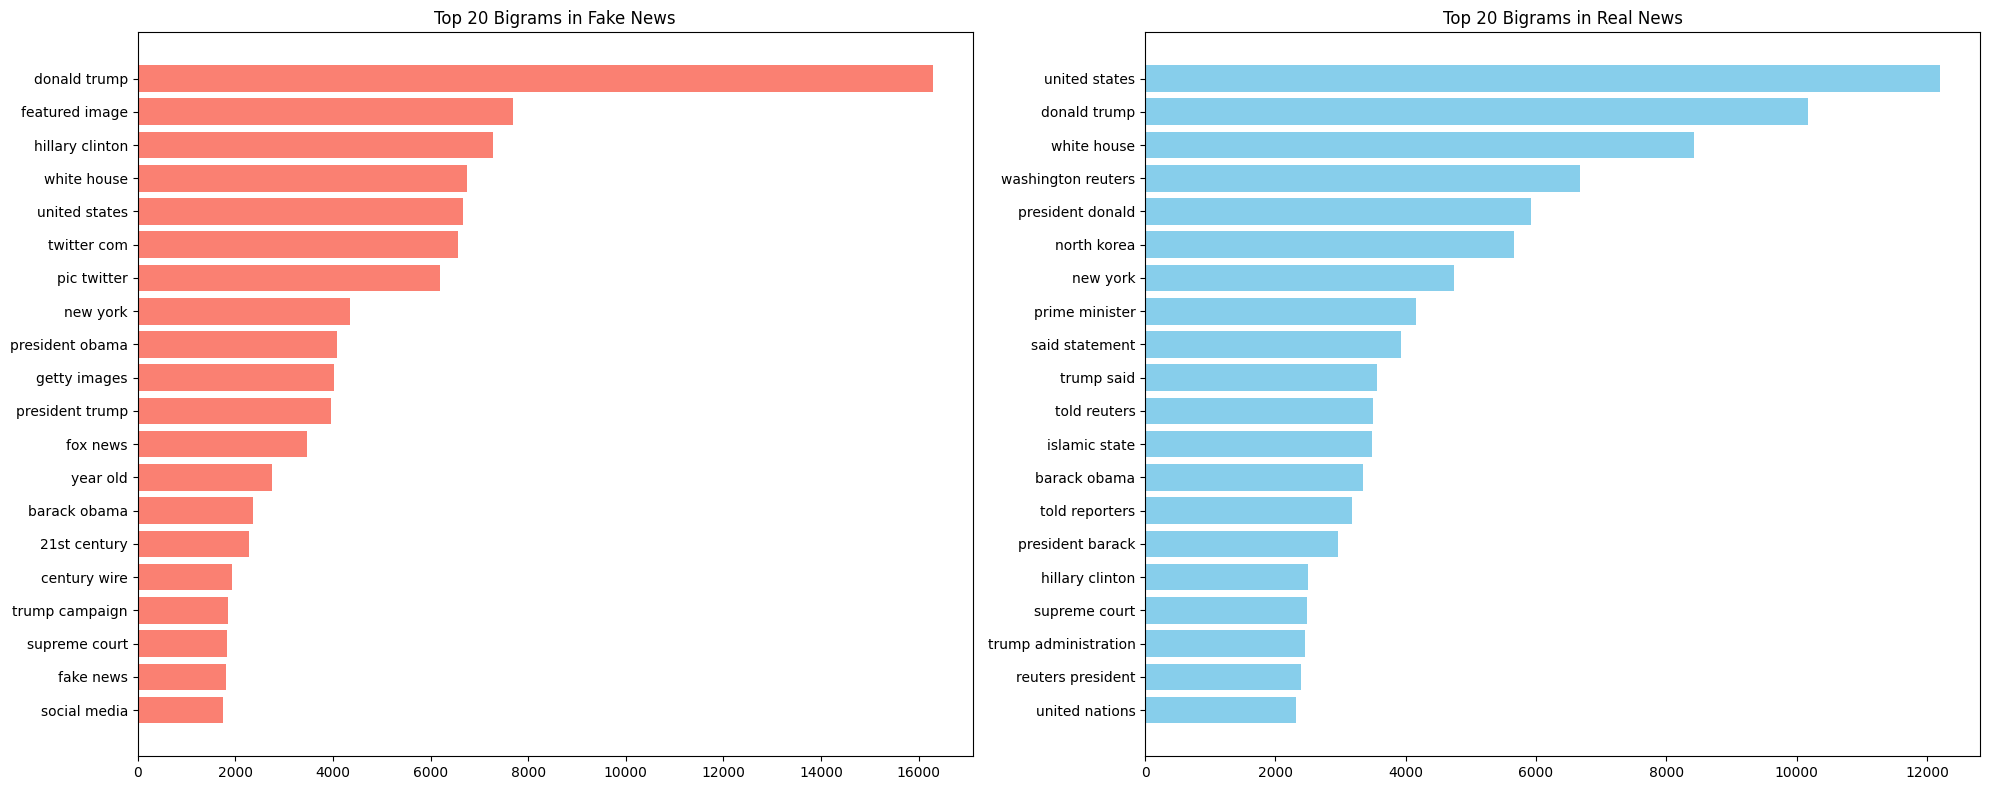

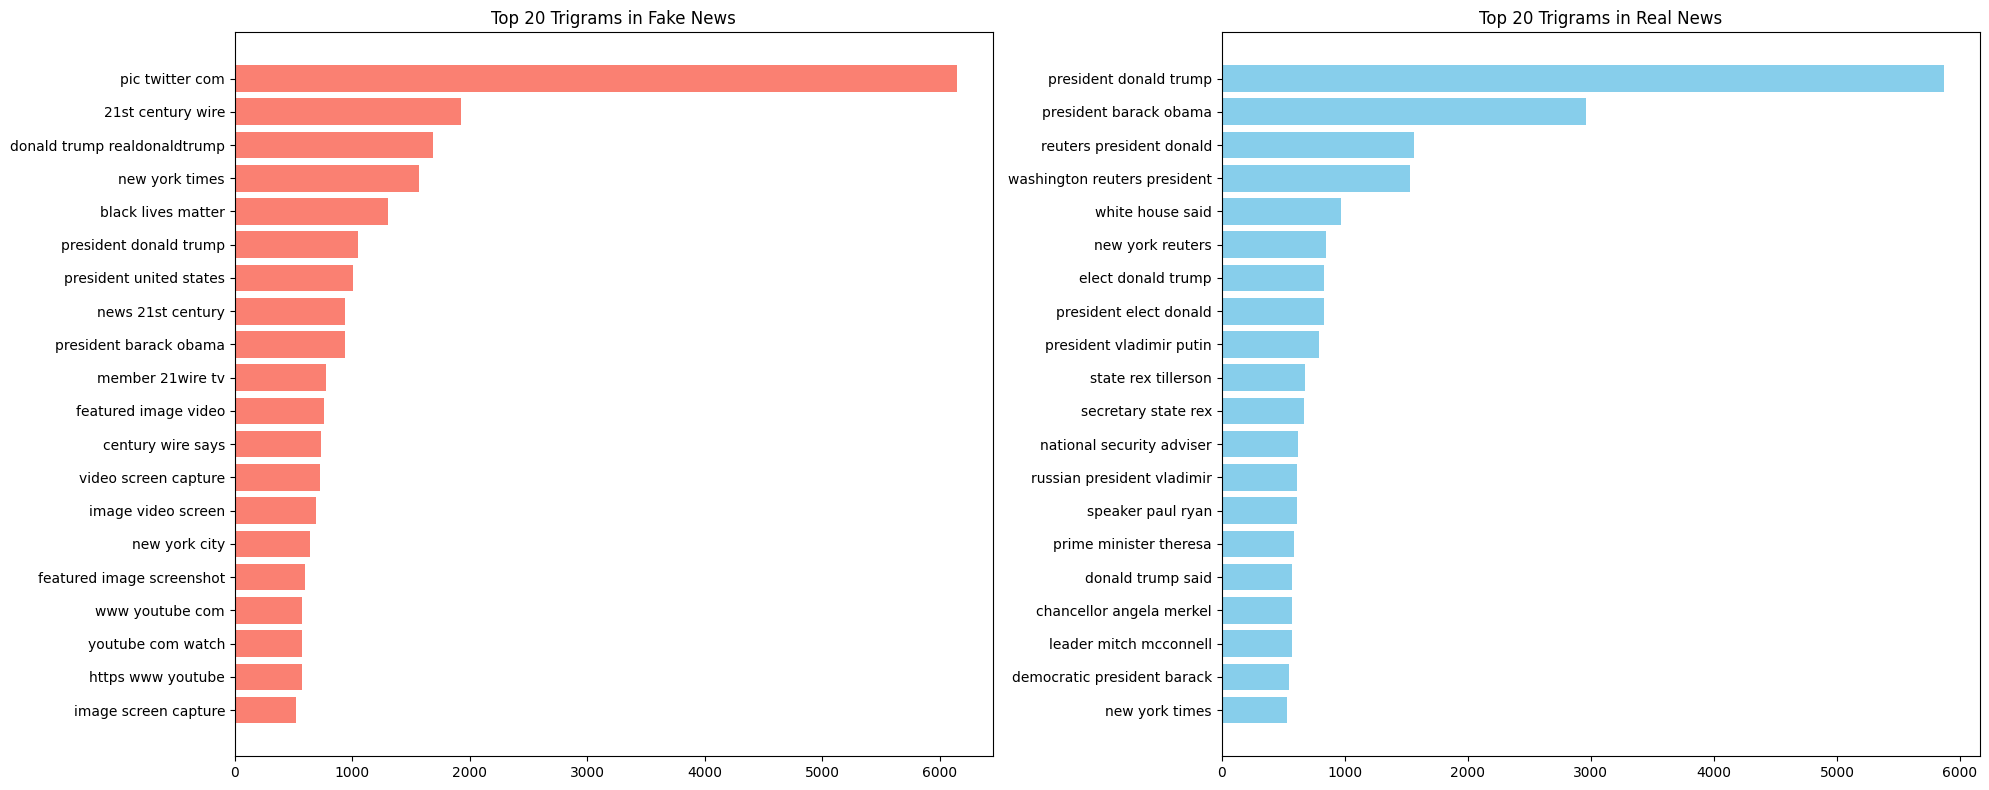

In [24]:
# Bigram plots
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.barh(fake_bigram_df['bigram'][::-1], fake_bigram_df['count'][::-1], color='salmon')
plt.title('Top 20 Bigrams in Fake News')

plt.subplot(1,2,2)
plt.barh(real_bigram_df['bigram'][::-1], real_bigram_df['count'][::-1], color='skyblue')
plt.title('Top 20 Bigrams in Real News')

plt.tight_layout()
plt.show()

# Trigram plots
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.barh(fake_trigram_df['trigram'][::-1], fake_trigram_df['count'][::-1], color='salmon')
plt.title('Top 20 Trigrams in Fake News')

plt.subplot(1,2,2)
plt.barh(real_trigram_df['trigram'][::-1], real_trigram_df['count'][::-1], color='skyblue')
plt.title('Top 20 Trigrams in Real News')

plt.tight_layout()
plt.show()


<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
        ⚙️ <b>Feature Engineering</b>
    </h1>
</div>


In [27]:
pd.crosstab(df['subject'], df['class'])

class,0,1
subject,,
Government News,1570,0
Middle-east,778,0
News,9050,0
US_News,783,0
left-news,4459,0
politics,6841,0
politicsNews,0,11272
worldnews,0,10145


In [28]:
df=df.drop(['title','date','subject'],axis=1)

In [29]:
df.head()

,text,class,word_count,char_count,sentence_count,avg_word_length,exclamation_count,question_count,polarity,subjectivity
0,ABIDJAN (Reuters) - Ivory Coast will cut its a...,1,259,1572,8,6.069498,0,0,0.062915,0.218121
1,BANGKOK (Reuters) - People in Thailand celebra...,1,269,1755,11,6.524164,0,0,0.096825,0.546032
2,"Reconquista, English Reconquest, in medieval S...",0,305,1891,14,6.200000,9,0,0.096000,0.263000
3,The last thing any politician running for the ...,0,437,2788,32,6.379863,0,6,0.054056,0.483529
4,The Republican Party has been wishing that Ame...,0,727,4357,27,5.993122,0,1,0.093741,0.374400


In [30]:
def clean_text(text):
    # lowercase
    text = text.lower()
    # remove URLs (http, https, www)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove extra spaces
    text = ' '.join(text.split())
    return text


In [31]:
df['text']=df['text'].apply(clean_text)

In [32]:
df.head()

,text,class,word_count,char_count,sentence_count,avg_word_length,exclamation_count,question_count,polarity,subjectivity
0,abidjan reuters ivory coast will cut its armed...,1,259,1572,8,6.069498,0,0,0.062915,0.218121
1,bangkok reuters people in thailand celebrated ...,1,269,1755,11,6.524164,0,0,0.096825,0.546032
2,reconquista english reconquest in medieval spa...,0,305,1891,14,6.200000,9,0,0.096000,0.263000
3,the last thing any politician running for the ...,0,437,2788,32,6.379863,0,6,0.054056,0.483529
4,the republican party has been wishing that ame...,0,727,4357,27,5.993122,0,1,0.093741,0.374400


<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
        🧩 <b>Splitting Training and Test Data</b>
    </h1>
</div>


In [33]:
x = df.drop(columns=['class'])  
y = df['class']

X = df['text'].astype(str)  
y = df['class']


x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)


print("xv_train:", xv_train.shape)
print("xv_test:", xv_test.shape)


xv_train: (35918, 5000)
xv_test: (8980, 5000)


***creating dataframe excluding stopwords***

In [34]:

from nltk.corpus import stopwords


nltk.download('stopwords', quiet=True)


stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    words = re.findall(r'\b\w+\b', str(text).lower())  # tokenize
    filtered_words = [w for w in words if w not in stop_words]
    return ' '.join(filtered_words)


df_prime = df.copy()
df_prime['text'] = df_prime['text'].apply(remove_stopwords)


print(df_prime.head())


                                                text  class  word_count  \
0  abidjan reuters ivory coast cut armed forces 1...      1         259   
1  bangkok reuters people thailand celebrated loy...      1         269   
2  reconquista english reconquest medieval spain ...      0         305   
3  last thing politician running presidency needs...      0         437   
4  republican party wishing america would like ru...      0         727   

   char_count  sentence_count  avg_word_length  exclamation_count  \
0        1572               8         6.069498                  0   
1        1755              11         6.524164                  0   
2        1891              14         6.200000                  9   
3        2788              32         6.379863                  0   
4        4357              27         5.993122                  0   

   question_count  polarity  subjectivity  
0               0  0.062915      0.218121  
1               0  0.096825      0.546032  
2 

In [35]:
def prepare_tfidf_data(df, text_column='text', target_column='class', test_size=0.2, max_features=5000, random_state=42):
    X = df[text_column].astype(str)
    y = df[target_column]

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    xv_train = vectorizer.fit_transform(x_train)
    xv_test = vectorizer.transform(x_test)

    print("xv_train:", xv_train.shape)
    print("xv_test:", xv_test.shape)

    return xv_train, xv_test, y_train, y_test, vectorizer

# --- Now you can call it on multiple DataFrames separately ---

# First DataFrame
xv_train1, xv_test1, y_train1, y_test1, vec1 = prepare_tfidf_data(df)

# Excluding stopwords DataFrame
xv_train2, xv_test2, y_train2, y_test2, vec2 = prepare_tfidf_data(df_prime)


xv_train: (35918, 5000)
xv_test: (8980, 5000)
xv_train: (35918, 5000)
xv_test: (8980, 5000)


<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
        🚀 <b>Training Models</b>
    </h1>
</div>


In [36]:
from sklearn.model_selection import RandomizedSearchCV


model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=5000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [5, 10, 15, 20, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Linear SVC": {
        "model": LinearSVC(max_iter=5000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "loss": ["hinge", "squared_hinge"]
        }
    },
    "Multinomial NB": {
        "model": MultinomialNB(),
        "params": {
            "alpha": [0.01, 0.1, 0.5, 1]
        }
    },
    "Gradient Boost": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [300],
            "max_depth": [5],
            "learning_rate": [0.01],
            "min_samples_split": [2],
            "min_samples_leaf": [2],
            "max_features": ["sqrt", None]
        }
    }
}


def best_model_accuracy(models, xv_train, y_train, xv_test, y_test, n_iter=20, cv=3):
    best_results = {}
    
    for name, mp in models.items():
        print(f"\nTuning {name}...")
        clf = RandomizedSearchCV(mp["model"], mp["params"], n_iter=n_iter, cv=cv, n_jobs=-1, random_state=42)
        clf.fit(xv_train, y_train)
        y_pred = clf.predict(xv_test)
        acc = accuracy_score(y_test, y_pred)
        best_results[name] = {
            "best_accuracy": acc,
            "best_params": clf.best_params_
        }
        print(f"{name} Best Accuracy: {acc:.4f}")
        print(f"{name} Best Params: {clf.best_params_}")
    
    return best_results


results = best_model_accuracy(model_params, xv_train, y_train, xv_test, y_test)


results_clean = best_model_accuracy(model_params, xv_train2, y_train2, xv_test2, y_test2)



Tuning Logistic Regression...
Logistic Regression Best Accuracy: 0.9922
Logistic Regression Best Params: {'solver': 'liblinear', 'C': 10}

Tuning Decision Tree...
Decision Tree Best Accuracy: 0.9952
Decision Tree Best Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}

Tuning Linear SVC...
Linear SVC Best Accuracy: 0.9931
Linear SVC Best Params: {'loss': 'squared_hinge', 'C': 1}

Tuning Multinomial NB...
Multinomial NB Best Accuracy: 0.9283
Multinomial NB Best Params: {'alpha': 0.01}

Tuning Gradient Boost...
Gradient Boost Best Accuracy: 0.9954
Gradient Boost Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.01}

Tuning Logistic Regression...
Logistic Regression Best Accuracy: 0.9913
Logistic Regression Best Params: {'solver': 'lbfgs', 'C': 10}

Tuning Decision Tree...
Decision Tree Best Accuracy: 0.9953
Decision Tree Best Params: {'min_samples_split': 2, 'min_samples_leaf':

<div style="background-color: #0074cc; 
            color: white; 
            padding: 14px 24px; 
            border-radius: 30px; 
            display: inline-block; 
            font-family: 'Segoe UI', sans-serif;">
    <h1 style="font-size: 22px; font-weight: 700; margin: 0;">
         <b>Prediction Accuracy</b>
    </h1>
</div>


In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')




estimators = [
    ('lr', LogisticRegression(**results['Logistic Regression']['best_params'], max_iter=5000)),
    ('dt', DecisionTreeClassifier(**results['Decision Tree']['best_params'])),
    ('svc', LinearSVC(**results['Linear SVC']['best_params'], max_iter=5000)),
    ('gb', GradientBoostingClassifier(**results['Gradient Boost']['best_params'], random_state=42))
]


stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=5000),
    cv=5,
    n_jobs=-1
)


stack_clf.fit(xv_train, y_train)
y_pred_stack = stack_clf.predict(xv_test)
stack_acc = accuracy_score(y_test, y_pred_stack)
print(f"\nStacked Model Accuracy: {stack_acc:.4f}")


stack_clf.fit(xv_train2, y_train2)
y_pred_stack2 = stack_clf.predict(xv_test2)
stack_acc2 = accuracy_score(y_test2, y_pred_stack2)
print(f"Stacked Model Accuracy on Cleaned Data: {stack_acc2:.4f}")



Stacked Model Accuracy: 0.9972
Stacked Model Accuracy on Cleaned Data: 0.9969


**Here we can see that the accuracy is almost the same even with removing the stopwords (99.69%) . Where without removing the stopwords we obtained 99.72% accuracy . In the stacking part we didn't use Multinomial NB as it always showed comparatively lower accuracy .**